In [ ]:
'''
 * Copyright (c) 2005 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Associative Learning
# Unsupervised Learning and Associative Learning

In this chapter, we introduce a collection of simple rules that facilitate **unsupervised learning**. Unlike the **supervised learning** methods discussed in earlier chapters, unsupervised learning does not require a target signal to define correct network behavior. Instead, these rules enable networks to learn associations between patterns that frequently occur together.

## Understanding Associations

An **association** is defined as a link between a system’s input and output such that when a pattern \( A \) is presented to the system, it responds with a pattern \( B \). The input pattern is referred to as the **stimulus**, while the output pattern is called the **response**. 

This concept of associations is fundamental and was a cornerstone of the **behaviorist school of psychology**, which sought to explain both animal and human behavior through associations and rules for learning them.

### Classical Conditioning

One of the earliest influences on behaviorism was Ivan Pavlov's experiment, where he trained a dog to salivate at the sound of a bell, which was rung whenever food was presented. This is an example of **classical conditioning**.

### Instrumental Conditioning

B. F. Skinner contributed significantly to behaviorism through his experiments, such as training a rat to press a bar to receive a food pellet. This is an instance of **instrumental conditioning**.

## Hebbian Learning

To provide a biological basis for behavior, Donald Hebb proposed his famous postulate:

$$
\text{"When an axon of cell A is near enough to excite a cell B and repeatedly or persistently takes part in firing it, some growth process or metabolic change takes place in one or both cells such that A's efficiency, as one of the cells firing B, is increased."}
$$

In Chapter 7, we analyzed a supervised learning rule based on Hebb's postulate. In this chapter, we will explore **unsupervised forms of Hebbian learning**, alongside other associative learning rules.

## Influential Researchers

Several researchers have made significant contributions to the development of associative learning, including:

- **Tuevo Kohonen**
- **James Anderson**
- **Stephen Grossberg**

Anderson and Kohonen independently developed the **linear associator network** in the late 1960s and early 1970s, while Grossberg introduced **nonlinear continuous-time associative networks** during the same period. Their work, along with contributions from many others, continues to influence the field of associative learning.

## Conclusion

This chapter will delve into the elemental associative learning rules. Following this, Chapters 14–16 will introduce more complex networks that build upon these foundational concepts.



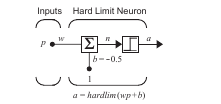

Figure 15.1 Single-Input Hard Limit Associator

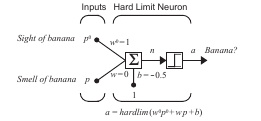

Figure 15.2 Banana Associator
# Simple Associative Network

In this section, we examine the simplest network capable of implementing an association: the **single-input hard limit neuron**.

## Single-Input Hard Limit Associator

The neuron's output \( a \) is determined from its input \( p \) according to the equation:

$$
a = \text{hardlim}(wp + b) = \text{hardlim}(wp - 0.5) \quad (15.1)
$$

For simplicity, we restrict the value of \( p \) to either 0 or 1, indicating whether a stimulus is absent or present. The output \( a \) will be limited to the same values due to the hard limit transfer function, indicating the presence or absence of the network's response:

$$
\begin{align*}
p & = 
\begin{cases} 
1, & \text{stimulus present} \\ 
0, & \text{no stimulus}
\end{cases} \\

a & = 
\begin{cases} 
1, & \text{response} \\ 
0, & \text{no response}
\end{cases} \quad (15.2)
\end{align*}
$$

The presence of an association between the stimulus $ p = 1 $ and the response $ a = 1 $ is dictated by the value of $ w $. The network will respond to the stimulus only if $ w $ is greater than $-b$ (in this case, 0.5).

## Learning Rules and Input Types

The learning rules discussed in this chapter are usually applied within the framework of a larger network. To demonstrate the operation of the associative learning rules without involving complex networks, we will use simple networks with two types of inputs.

- One set of inputs will represent the **unconditioned stimulus** (analogous to the food in Pavlov's experiment).
- Another set of inputs will represent the **conditioned stimulus** (analogous to the bell in Pavlov's experiment).

Initially, the response is triggered only by the unconditioned stimulus. However, when the conditioned stimulus is repeatedly paired with the unconditioned stimulus, the network learns to respond to the conditioned stimulus.

### Example: Recognizing Bananas

Figure 15.2 illustrates a network designed to recognize bananas, which incorporates both an unconditioned stimulus (banana shape) and a conditioned stimulus (banana smell).

#### Network Configuration

- The unconditioned stimulus is represented as $ p_0 $ (shape detected).
- The conditioned stimulus is represented as $ p_1 $ (smell detected).

The inputs for this network are defined as follows:

$$
\begin{align*}
p_0 & = 
\begin{cases} 
1, & \text{shape detected} \\ 
0, & \text{shape not detected}
\end{cases} \\

p_1 & = 
\begin{cases} 
1, & \text{smell detected} \\ 
0, & \text{smell not detected}
\end{cases} \quad (15.3)
\end{align*}
$$

### Associating Inputs and Outputs

We want the network to associate the shape of a banana with a response indicating that the fruit is a banana. The problem is addressed by assigning $ w_0 $ and $ w $ such that:

$$
\begin{align*}
w_0 & = 1, \\ 
w & = 0. \quad (15.4)
\end{align*}
$$

Now, the banana associator's input/output function simplifies to:

$$
a = \text{hardlim}(p - 0.5) \quad (15.5)
$$

Thus, the network will only respond if a banana is sighted $( p_0 = 1 $), regardless of whether a banana is smelled $( p_1 = 1 $) or not $( p_1 = 0 $). This network will be used later to illustrate the performance of several associative learning rules.



In [1]:
# Simple Associative Network Implementation

class HardLimitNeuron:
    def __init__(self, w0, w, b):
        """
        Initialize the hard limit neuron with weights and bias.
        
        Parameters:
        w0 : float : weight for unconditioned stimulus
        w : float : weight for conditioned stimulus
        b : float : bias
        """
        self.w0 = w0  # Weight for unconditioned stimulus
        self.w = w    # Weight for conditioned stimulus
        self.b = b    # Bias
    
    def hardlim(self, x):
        """
        Hard limit activation function.
        
        Parameters:
        x : float : input to the activation function
        
        Returns:
        int : output of the hard limit function (0 or 1)
        """
        return 1 if x > 0 else 0

    def output(self, p0, p1):
        """
        Calculate the output of the neuron based on the inputs.
        
        Parameters:
        p0 : int : input for unconditioned stimulus (0 or 1)
        p1 : int : input for conditioned stimulus (0 or 1)
        
        Returns:
        int : neuron output (0 or 1)
        """
        # Calculate the weighted sum and apply bias
        net_input = (self.w0 * p0) + (self.w * p1) + self.b
        return self.hardlim(net_input)

# Define weights and bias
w0 = 1  # Weight for the unconditioned stimulus (banana shape)
w = 0   # Weight for the conditioned stimulus (banana smell)
b = -0.5  # Bias

# Create the neuron
neuron = HardLimitNeuron(w0, w, b)

# Test cases
test_cases = [
    (1, 1),  # Shape detected, smell detected
    (1, 0),  # Shape detected, smell not detected
    (0, 1),  # Shape not detected, smell detected
    (0, 0),  # Shape not detected, smell not detected
]

# Output results
for p0, p1 in test_cases:
    response = neuron.output(p0, p1)
    print(f"Shape detected: {p0}, Smell detected: {p1} -> Response: {response}")


Shape detected: 1, Smell detected: 1 -> Response: 1
Shape detected: 1, Smell detected: 0 -> Response: 1
Shape detected: 0, Smell detected: 1 -> Response: 0
Shape detected: 0, Smell detected: 0 -> Response: 0


## Unsupervised Hebb Rule

For simple problems, it is not difficult to design a network with a fixed set of associations. However, a more useful network would be able to learn associations. When should an association be learned? It is generally accepted that both animals and humans tend to associate things that occur simultaneously. To paraphrase Hebb: if a banana smell stimulus occurs simultaneously with a banana concept response (activated by some other stimulus such as the sight of a banana shape), the network should strengthen the connection between them so that later it can activate its banana concept in response to the banana smell alone.

The unsupervised Hebb rule does just that by increasing the weight $ w_{ij} $ between a neuron's input $ p_j $ and output $ a_i $ in proportion to their product:

$$
w_{ij}(q) = w_{ij}(q-1) + \alpha a_i(q) p_j(q)
$$

The learning rate $ \alpha $ dictates how many times a stimulus and response must occur together before an association is made. In the network shown in Figure .2, an association will be made when $ w > -b = 0.5 $, since then $ p = 1 $ will produce the response $ a = 1 $, regardless of the value of $ p_0 $.

Note that Eq. (15.6) uses only signals available within the layer containing the weights being updated. Rules that satisfy this condition are called **local learning rules**. This is in contrast to the backpropagation rule, for example, in which the sensitivity must be propagated back from the final layer. The rules introduced in this chapter will all be local learning rules.

The unsupervised Hebb rule can also be written in vector form:

$$
W(q) = W(q-1) + \alpha a(q) p^T(q)
$$

As with all unsupervised rules, learning is performed in response to a series of inputs presented in time (the training sequence):

$$
p(1), p(2), \ldots, p(Q)
$$

(Note that we are using the notation $ p(q) $ instead of $ p_q $ in order to emphasize the time-sequence nature of the inputs.) At each iteration, the output $ a $ is calculated in response to the input $ p $, and then the weights $ W $ are updated with the Hebb rule.

Let’s apply the unsupervised Hebb rule to the banana associator. The associator will start with the weight values determined in our previous example, so that it will initially respond to the sight but not the smell of a banana:

$$
w_0 = 1, \quad w(0) = 0
$$

The associator will be repeatedly exposed to a banana. However, while the network's smell sensor will work reliably, the shape sensor will operate only intermittently (on even time steps). Thus, the training sequence will consist of repetitions of the following two sets of inputs:

$$
\{ p(1) = 0, p(1) = 1 \}, \{ p(2) = 1, p(2) = 1 \}, \ldots
$$

The first weight $ w_0 $, representing the weight for the unconditioned stimulus $ p_0 $, will remain constant, while $ w $ will be updated at each iteration, using the unsupervised Hebb rule with a learning rate of 1:

$$
w(q) = w(q-1) + a(q)p(q)
$$

The output for the first iteration $( q = 1 $) is:

$$
a(1) = \text{hardlim}(w p(1) + w_0 p(1) - 0.5) = \text{hardlim}(1 \cdot 0 + 0 \cdot 1 - 0.5) = 0 \quad (\text{no response})
$$

Because the smell alone did not generate a response, the Hebb rule does not alter \( w \):

$$
w(1) = w(0) + a(1)p(1) = 0 + 0 \cdot 1 = 0
$$

In the second iteration, both the banana's shape and smell are detected, and the network responds accordingly:

$$
a(2) = \text{hardlim}(w p(2) + w(1)p(2) - 0.5) = \text{hardlim}(1 \cdot 1 + 0 \cdot 1 - 0.5) = 1 \quad (\text{banana})
$$

Because the smell stimulus and the response have occurred simultaneously, the Hebb rule increases the weight between them:

$$
w(2) = w(1) + a(2)p(2) = 0 + 1 \cdot 1 = 1
$$

When the sight detector fails again, in the third iteration, the network responds anyway. It has made a useful association between the smell of a banana and its response:

$$
a(3) = \text{hardlim}(w p(3) + w(2)p(3) - 0.5) = \text{hardlim}(1 \cdot 0 + 1 \cdot 1 - 0.5) = 1 \quad (\text{banana})
$$

The weight is updated as follows:

$$
w(3) = w(2) + a(3)p(3) = 1 + 1 \cdot 1 = 2
$$

From now on, the network is capable of responding to bananas that are detected either by sight or smell. Even if both detection systems suffer intermittent faults, the network will be correct most of the time.

We have seen that the unsupervised Hebb rule can learn useful associations. However, the Hebb rule, as defined in Eq. (15.6), has some practical shortcomings. The first problem becomes evident if we continue to present inputs and update $ w $ in the example above. The weight $ w $ will become arbitrarily large. This is at odds with the biological systems that inspired the Hebb rule; synapses cannot grow without bound.

The second problem is that there is no mechanism for weights to decrease. If the inputs or outputs of a Hebb network experience any noise, every weight will grow (however slowly) until the network responds to any stimulus.


In [2]:
# Define the hard limit activation function
def hardlim(x):
    return 1 if x > 0 else 0

# Initialize weights
w0 = 1          # Weight for unconditioned stimulus (shape)
w = 0           # Weight for conditioned stimulus (smell)
b = -0.5        # Bias
learning_rate = 1

# Define training sequence
# Even indices correspond to p0 = 0 (shape not detected), p1 = 1 (smell detected)
# Odd indices correspond to p0 = 1 (shape detected), p1 = 1 (smell detected)
training_sequence = [
    (0, 0),  # Iteration 1: no shape, no smell
    (1, 1),  # Iteration 2: shape detected, smell detected
    (0, 1),  # Iteration 3: no shape, smell detected
    (1, 1),  # Iteration 4: shape detected, smell detected
]

# Track outputs and weights over iterations
outputs = []
weights = [w]  # Store initial weight for later reference

# Simulate the learning process
for q in range(len(training_sequence)):
    p0, p1 = training_sequence[q]  # Unconditioned and conditioned inputs

    # Calculate output
    a = hardlim(w0 * p0 + w * p1 + b)
    outputs.append(a)

    # Update weights using the unsupervised Hebb rule
    w = w + learning_rate * a * p1
    weights.append(w)

# Print results
print("Iteration | p0 | p1 | Output | Weight")
for i in range(len(training_sequence)):
    print(f"{i+1:9} | {training_sequence[i][0]:2} | {training_sequence[i][1]:2} | {outputs[i]:6} | {weights[i]:.2f}")


Iteration | p0 | p1 | Output | Weight
        1 |  0 |  0 |      0 | 0.00
        2 |  1 |  1 |      1 | 0.00
        3 |  0 |  1 |      1 | 1.00
        4 |  1 |  1 |      1 | 2.00


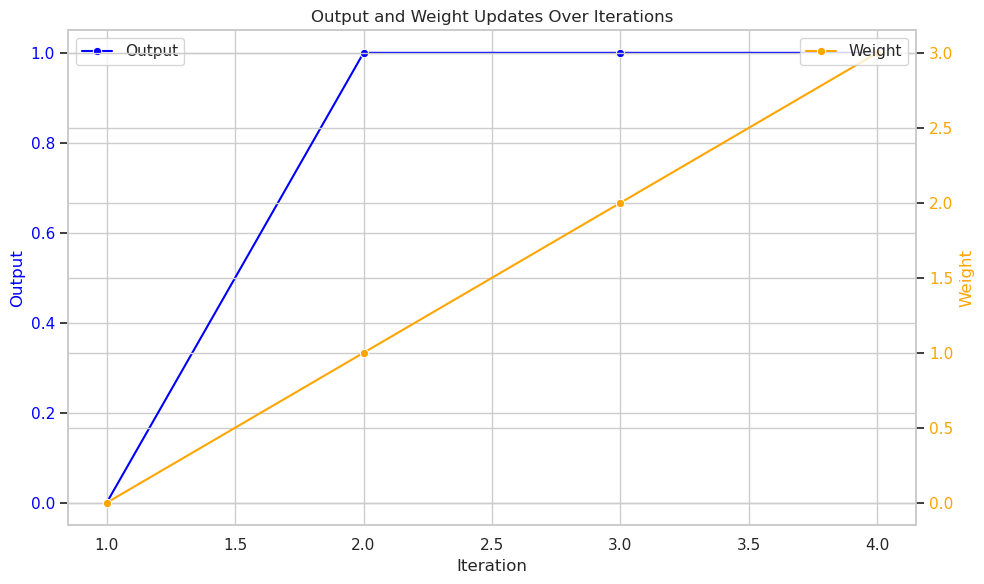

In [3]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the hard limit activation function
def hardlim(x):
    return 1 if x > 0 else 0

# Initialize weights
w0 = 1          # Weight for unconditioned stimulus (shape)
w = 0           # Weight for conditioned stimulus (smell)
b = -0.5        # Bias
learning_rate = 1

# Define training sequence
# Even indices correspond to p0 = 0 (shape not detected), p1 = 1 (smell detected)
# Odd indices correspond to p0 = 1 (shape detected), p1 = 1 (smell detected)
training_sequence = [
    (0, 0),  # Iteration 1: no shape, no smell
    (1, 1),  # Iteration 2: shape detected, smell detected
    (0, 1),  # Iteration 3: no shape, smell detected
    (1, 1),  # Iteration 4: shape detected, smell detected
]

# Track outputs and weights over iterations
outputs = []
weights = [w]  # Store initial weight for later reference

# Simulate the learning process
for q in range(len(training_sequence)):
    p0, p1 = training_sequence[q]  # Unconditioned and conditioned inputs

    # Calculate output
    a = hardlim(w0 * p0 + w * p1 + b)
    outputs.append(a)

    # Update weights using the unsupervised Hebb rule
    w = w + learning_rate * a * p1
    weights.append(w)

# Prepare data for plotting
data = pd.DataFrame({
    'Iteration': list(range(1, len(training_sequence) + 1)),
    'Output': outputs,
    'Weight': weights[1:]  # Exclude the initial weight for the plot
})

# Set the plot style
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the output on the first y-axis
sns.lineplot(data=data, x='Iteration', y='Output', marker='o', ax=ax1, label='Output', color='blue')
ax1.set_ylabel('Output', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis to plot the weights
ax2 = ax1.twinx()
sns.lineplot(data=data, x='Iteration', y='Weight', marker='o', ax=ax2, label='Weight', color='orange')
ax2.set_ylabel('Weight', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add titles and legends
plt.title('Output and Weight Updates Over Iterations')
ax1.set_xlabel('Iteration')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


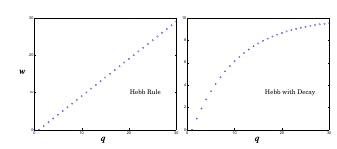

Figure.3 Response of the Hebb Rule, With and Without Decay

## Hebb Rule with Decay

One way to improve the Hebb rule is by adding a weight decay term. The updated weight equation is:

$$
W(q) = W(q - 1) + \alpha a(q) p^T(q) - \gamma W(q - 1) = (1 - \gamma) W(q - 1) + \alpha a(q) p^T(q)
$$

where $ \gamma $, the decay rate, is a positive constant less than one. As $ \gamma $ approaches zero, the learning law becomes the standard rule. As $ \gamma $ approaches one, the learning law quickly forgets old inputs and remembers only the most recent patterns. This keeps the weight matrix from growing without bound. The idea of filtering the weight changes is similar to the concept of momentum.

### Maximum Weight Value

The maximum weight value $ w_{ij} $ is determined by $ \gamma $. This value can be found by maximizing the learning rate in the scalar version of the equation:

$$
w_{ij} = (1 - \gamma) w_{ij} + \alpha
$$

Setting both $ a_i $ and $ p_j $ to 1 for all $ q $ to find the steady-state weight:

$$
w_{ij} = (1 - \gamma) w_{ij} + \alpha \implies w_{ij} = \frac{\alpha}{\gamma}
$$

### Example: Banana Associator Problem

Let’s examine the operation of the Hebb rule with decay using a decay rate $ \gamma = 0.1 $.

1. The first iteration, where only the smell stimulus is presented, results in:
   - $ a(1) = 0 $ (no response)
   - $ w(1) = 0 $

2. The second iteration produces identical results where both stimuli are presented:
   - $ a(2) = 1 $ (banana)
   - $ w(2) = 1 $

3. In the third iteration, the network continues to learn:
   - $ w(3) = w(2) + a(3)p(3) - 0.1w(2) = 1 + 1 \cdot 1 - 0.1 \cdot 1 = 1.9 $

This weight increase is only $ 0.9 $, instead of $ 1.0 $, demonstrating the effect of decay.

### Maximum Weight with Decay

The maximum weight $ w_{ij} $ can be calculated as:

$$
w_{ij} = \frac{\alpha}{\gamma} = \frac{10}{0.1} = 100
$$

### Benefits of Hebb Rule with Decay

The Hebb rule with decay prevents weights from growing indefinitely. Additionally, it ensures that associations learned by the network are not artifacts of noise; any small random increases will eventually decay away.

### Limitations

While the Hebb rule with decay addresses the problem of large weights, it introduces a trade-off. The environment must occasionally present all stimuli that have associations; otherwise, without reinforcement, associations will decay. 

For instance, if $ a_i = 0 $:

$$
w_{ij}(q) = (1 - \gamma) w_{ij}(q - 1)
$$

With $ \gamma = 0.1 $:

$$
w_{ij}(q) = 0.9 w_{ij}(q - 1)
$$

This indicates that $ w_{ij} $ will decrease by 10% at each presentation where $ a_i = 0 $. Any association that was previously learned will eventually be lost.

To experiment with the Hebb rule with decay, use the Neural Network Design Demonstration: *Hebb with Decay* and *Effect of Decay Rate*.


In [4]:
# Hebb Rule with Decay Implementation

# Initialize parameters
alpha = 1.0  # Learning rate
gamma = 0.1  # Decay rate
num_iterations = 30  # Number of iterations

# Initial weights
w = [0, 1]  # [w_0, w_1]
# Response output
a = []

# Simulate the training sequence
for q in range(1, num_iterations + 1):
    # Inputs: Smell (p_0) and Shape (p_1)
    p_0 = 1 if q % 2 == 0 else 0  # Smell sensor
    p_1 = 1 if q % 2 == 1 else 0  # Shape sensor

    # Calculate output using hard limit function
    output = w[0] * p_0 + w[1] * p_1
    response = 1 if output > 0.5 else 0
    a.append(response)

    # Update weights using the Hebb rule with decay
    w[0] = (1 - gamma) * w[0] + alpha * response * p_0  # w_0 (smell)
    w[1] = (1 - gamma) * w[1] + alpha * response * p_1  # w_1 (shape)

# Final weights and responses
final_weights = w
responses = a

# Print results
print("Final Weights:", final_weights)
print("Responses:", responses)


Final Weights: [0.0, 4.578433040129456]
Responses: [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]


## Simple Recognition Network

So far we have considered only associations between scalar inputs and outputs. We will now examine a neuron that has a vector input. This neuron, which is sometimes referred to as an **instar**, is the simplest network that is capable of pattern recognition, as we will demonstrate shortly.

## Architecture of the Instar

The architecture of the instar is shown in Figure 15.4:



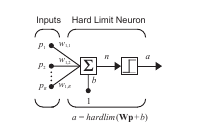

Figure.4 Instar


You will notice the similarities between the instar and the perceptron. We give these networks different names for historical reasons, since they arose at different times and out of different environments, and because they perform different functions and are analyzed in different ways.

For example, we will not directly consider the decision boundary of the instar, although this was an important concept for the perceptron. Instead, we will analyze the ability of the instar to recognize a pattern.

## Input/Output Expression

The input/output expression for the instar is given by:

$$
a = \text{hardlim}(Wp + b) = \text{hardlim}(1 \cdot w^T p + b)
$$

The instar will be active whenever the inner product between the weight vector (row of the weight matrix) and the input is greater than or equal to \(-b\):

$$
1 \cdot w^T p \geq -b
$$

From our discussion of the Hamming network, we know that for two vectors of constant length, the inner product will be largest when they point in the same direction. This can be expressed as:

$$
1 \cdot w^T p = 1 \cdot w p \cos \theta \geq -b
$$

where $\theta$ is the angle between the two vectors. Clearly, the inner product is maximized when the angle $\theta$ is $0$.

If $p$ and $w$ have the same length $(p = w$), then the inner product will be largest when $p = w$. Based on these arguments, the instar will be active when $p$ is "close" to $w$.

## Setting the Bias

By setting the bias $b$ appropriately, we can select how close the input vector must be to the weight vector in order to activate the instar. If we set:

$$
b = -1 \cdot w^T p
$$

then the instar will only be active when \(p\) points in exactly the same direction as $w$ $(\theta = 0$). Thus, we will have a neuron that recognizes only the pattern $w$.

If we would like the instar to respond to any pattern near $w$ (small $\theta$), then we can increase $b$ to some value larger than $-1 \cdot w^T p$. The larger the value of $b$, the more patterns there will be that can activate the instar, thus making it less discriminatory.

We should note that this analysis assumes that all input vectors have the same length (norm). We will revisit the question of normalization in Chapters 16, 18, and 19.

## Learning a Vector without Supervision

We can now design a vector recognition network if we know which vector we want to recognize. However, if the network is to learn a vector without supervision, we need a new rule since neither version of the Hebb rule produces normalized weights.


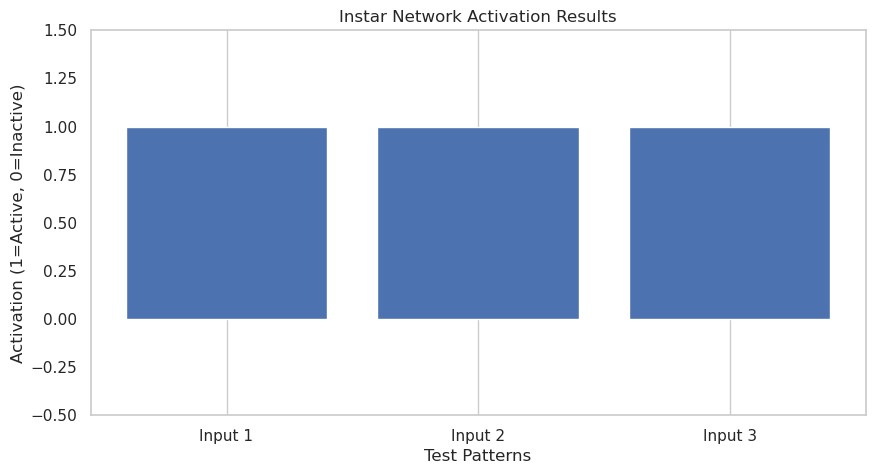

In [5]:
import random
import matplotlib.pyplot as plt

# Define the hard limit activation function
def hardlim(x):
    return 1 if x >= 0 else 0

class Instar:
    def __init__(self, input_size):
        # Initialize weights randomly
        self.weights = [random.uniform(-1, 1) for _ in range(input_size)]
        self.bias = random.uniform(-1, 1)

    def activate(self, inputs):
        # Calculate the weighted sum
        weighted_sum = sum(w * x for w, x in zip(self.weights, inputs)) + self.bias
        # Apply hard limit activation function
        return hardlim(weighted_sum)

    def train(self, input_vector):
        # Adjust weights and bias based on the input vector
        for i in range(len(self.weights)):
            self.weights[i] += input_vector[i]  # Update weights
        self.bias += 1  # Increment bias for recognition

# Create an instance of the Instar class
input_size = 3  # Example input size
instar = Instar(input_size)

# Example input patterns to recognize
patterns = [
    [1, 0, 1],  # Pattern 1
    [0, 1, 1],  # Pattern 2
    [1, 1, 0],  # Pattern 3
]

# Training the network on the given patterns
for pattern in patterns:
    instar.train(pattern)

# Testing the network with various input vectors
test_patterns = [
    [1, 0, 1],  # Should activate
    [0, 0, 0],  # Should not activate
    [1, 1, 1],  # Should not activate
]

# Store results for plotting
results = [instar.activate(p) for p in test_patterns]

# Plotting the results
plt.figure(figsize=(10, 5))
plt.bar(range(len(test_patterns)), results, tick_label=[f'Input {i+1}' for i in range(len(test_patterns))])
plt.ylim([-0.5, 1.5])
plt.title('Instar Network Activation Results')
plt.xlabel('Test Patterns')
plt.ylabel('Activation (1=Active, 0=Inactive)')
plt.grid(axis='y')
plt.show()


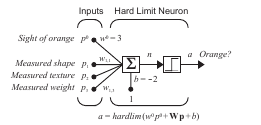

Figure.6 Orange Recognizer

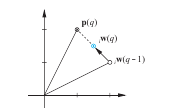
Figure.5 Graphical Representation of the Instar Rule


# Instar Rule

One problem of the Hebb rule with decay was that it required stimuli to be repeated or associations would be lost. A better rule might allow weight decay only when the instar is active $(a \neq 0)$. Weight values would still be limited, but forgetting would be minimized.

Consider again the original Hebb rule:

$$
w_{ij}(q) = w_{ij}(q - 1) + \alpha a_i(q)p_j(q) 
$$

To get the benefits of weight decay while limiting the forgetting problem, a decay term can be added that is proportional to \(a_i(q)\):

$$
w_{ij}(q) = w_{ij}(q - 1) + \alpha a_i(q)p_j(q) - \gamma a_i(q)w_{ij}(q - 1)
$$

We can simplify this equation by setting \(\gamma\) equal to \(\alpha\) (so new weight values are learned at the same rate old values decay) and gathering terms:

$$
w_{ij}(q) = w_{ij}(q - 1) + \alpha a_i(q) (p_j(q) - w_{ij}(q - 1))
$$

This equation, called the instar rule, can also be rewritten in vector form:

$$
\mathbf{w}(q) = \mathbf{w}(q - 1) + \alpha a_i(q) (\mathbf{p}(q) - \mathbf{w}(q - 1))
$$

The performance of the instar rule can be best understood if we consider the case where the instar is active \((a_i = 1)\$. The equation can then be written as:

$$
\mathbf{w}(q) = \mathbf{w}(q - 1) + \alpha (\mathbf{p}(q) - \mathbf{w}(q - 1)) = (1 - \alpha) \mathbf{w}(q - 1) + \alpha \mathbf{p}(q)
$$

This operation is displayed graphically in Figure.5.

When the instar is active, the weight vector is moved toward the input vector along a line between the old weight vector and the input vector. The distance the weight vector moves depends on the value of $\alpha$. 

- When $\alpha = 0$, the new weight vector is equal to the old weight vector (no movement).
- When $\alpha = 1$, the new weight vector is equal to the input vector (maximum movement).
- If $\alpha = 0.5$, the new weight vector will be halfway between the old weight vector and the input vector.

One useful feature of the instar rule is that if the input vectors are normalized, then $\mathbf{w}$ will also be normalized once it has learned a particular vector $\mathbf{p}$. We have found a rule that not only minimizes forgetting but results in normalized weight vectors if the input vectors are normalized.

## Application to Orange Recognizer

Let’s apply the instar rule to the network shown in Figure.6. It has two inputs: one indicating whether a fruit has been visually identified as an orange (unconditioned stimulus) and another consisting of the three measurements taken of the fruit (conditioned stimulus). The output of this network is:

$$
a = \text{hardlim}(\mathbf{w} \cdot \mathbf{p} + b)
$$

The elements of input $\mathbf{p}$ will be constrained to ±1 values, as defined in Chapter 3:

$$
\begin{aligned}
p_0 &= 1, \quad \text{(orange detected visually)} \\
p_1 &= 0, \quad \text{(shape)} \\
p_2 &= 0, \quad \text{(texture)}
\end{aligned}
$$

The bias $b$ is set to -2, a value slightly more positive than $-\|\mathbf{p}\| = -3$.

We would like the network to have a constant association between the sight of an orange and its response, so $w$ will be set greater than $-b$. But initially, the network should not respond to any combination of fruit measurements, so the measurement weights will start with values of zero:

$$
\begin{aligned}
\mathbf{w}(0) &= [3, 0, 0] \\
\mathbf{W}(0) &= [0, 0, 0]
\end{aligned}
$$

The measurement weights will be updated with the instar rule, using a learning rate of $\alpha = 1$:

$$
\mathbf{w}(q) = \mathbf{w}(q - 1) + a(q)(\mathbf{p}(q) - \mathbf{w}(q - 1))
$$

The training sequence will consist of repeated presentations of an orange. The measurements will be given every time. However, in order to demonstrate the operation of the instar rule, we will assume that the visual system only operates correctly on even time steps due to a fault in its construction:

$$
\begin{aligned}
\mathbf{p}(1) &= [0, -1, -1] \\
\mathbf{p}(2) &= [1, -1, -1] \\
&\vdots
\end{aligned}
$$

Because $\mathbf{W}$ initially contains all zeros, the instar does not respond to the measurements of an orange in the first iteration.


In [9]:
# Define the hard limit activation function
def hardlim(x):
    """Applies the hard limit activation function."""
    return 1 if x >= 0 else 0

# Initialize parameters
alpha = 1  # Learning rate
b = -2     # Bias
w0 = 3     # Initial weight for the visual input (unconditioned stimulus)
W = [0, 0, 0]  # Initial weights for the measurements (conditioned stimulus)
num_iterations = 3  # Number of iterations

# Define the input vectors for each iteration
# Format: [visual_input, shape_measurement, texture_measurement, weight_measurement]
inputs = [
    [0, 0, 0, 0],  # p(1): orange not detected visually
    [1, 1, -1, -1],  # p(2): orange detected visually
    [0, 0, -1, -1]   # p(3): orange not detected visually
]

# Initialize the activation output
activations = []

# Training loop
for q in range(num_iterations):
    # Calculate the weighted sum
    weighted_sum = w0 * inputs[q][0] + sum(W[i] * inputs[q][i + 1] for i in range(len(W))) + b
    
    # Get the activation
    activation = hardlim(weighted_sum)
    activations.append(activation)

    # Display the activation result
    print(f"a({q + 1}) = hardlim({w0} * {inputs[q][0]} + " +
          f"sum(W * {inputs[q][1:]}) + {b}) = {activation}")

    # Update weights only if the activation is 1
    if activation == 1:
        for i in range(len(W)):
            W[i] += alpha * (inputs[q][i + 1] - W[i])  # Update weights based on the instar rule

    # Display updated weights
    print(f"Updated weights W after iteration {q + 1}: {W}")

# Final weights after all iterations
print(f"Final weights after {num_iterations} iterations: {W}")


a(1) = hardlim(3 * 0 + sum(W * [0, 0, 0]) + -2) = 0
Updated weights W after iteration 1: [0, 0, 0]
a(2) = hardlim(3 * 1 + sum(W * [1, -1, -1]) + -2) = 1
Updated weights W after iteration 2: [1, -1, -1]
a(3) = hardlim(3 * 0 + sum(W * [0, -1, -1]) + -2) = 1
Updated weights W after iteration 3: [0, -1, -1]
Final weights after 3 iterations: [0, -1, -1]
